In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv
training_set=pd.read_csv('training_data.csv')
test_set=pd.read_csv('songs_to_classify.csv')

--2024-10-05 16:05:17--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   239KB/s    in 0.2s    

2024-10-05 16:05:18 (239 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2024-10-05 16:05:18--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [ ]:
# set the training and test set
training_set=pd.read_csv('training_data.csv')
test_set=pd.read_csv('songs_to_classify.csv')

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      200 non-null    float64
 1   danceability      200 non-null    float64
 2   duration          200 non-null    int64  
 3   energy            200 non-null    float64
 4   instrumentalness  200 non-null    float64
 5   key               200 non-null    int64  
 6   liveness          200 non-null    float64
 7   loudness          200 non-null    float64
 8   mode              200 non-null    int64  
 9   speechiness       200 non-null    float64
 10  tempo             200 non-null    float64
 11  time_signature    200 non-null    int64  
 12  valence           200 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 20.4 KB


In [ ]:
training_set.info()
training_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

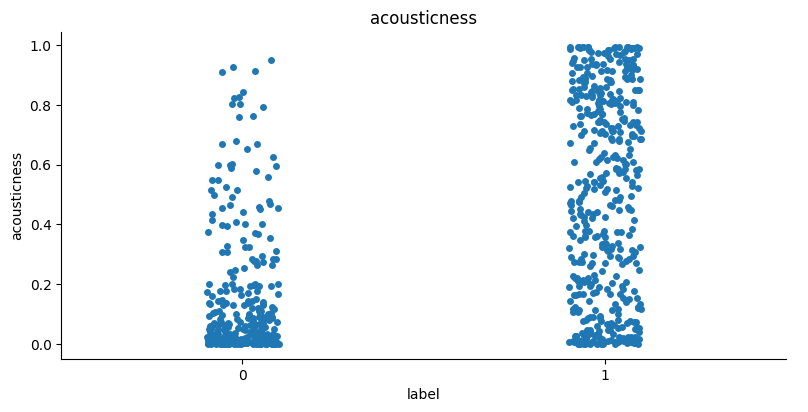

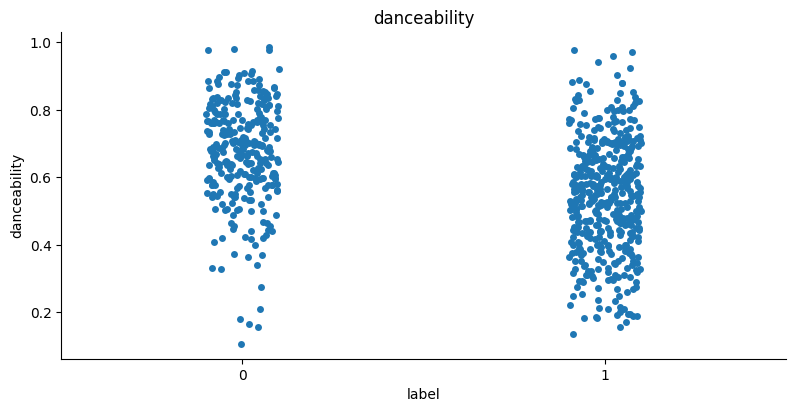

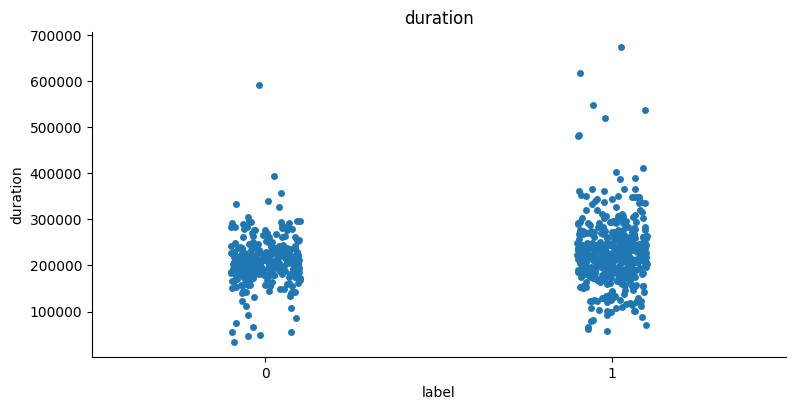

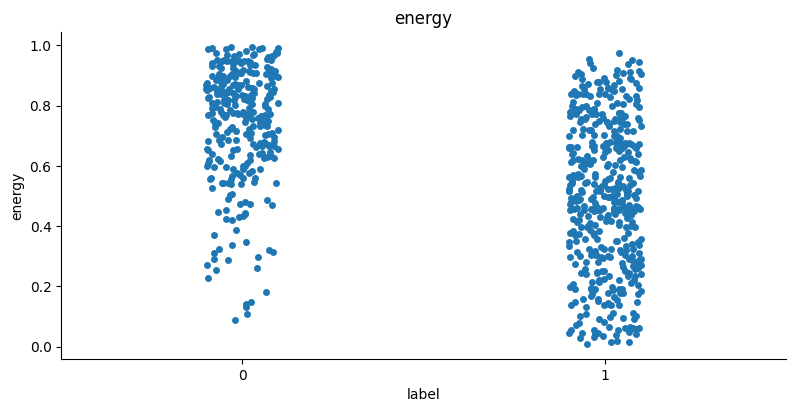

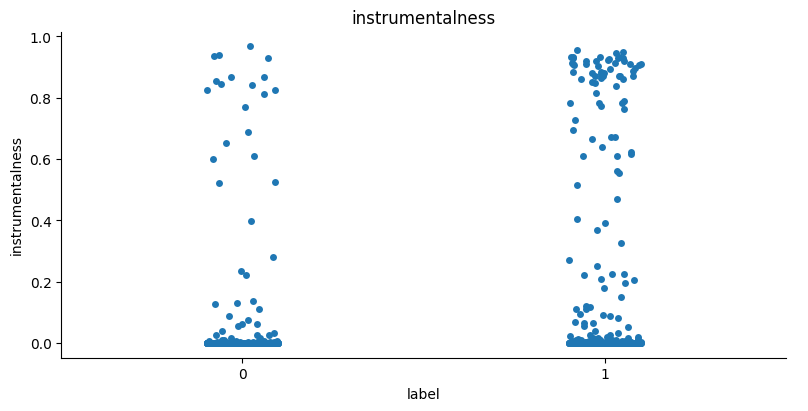

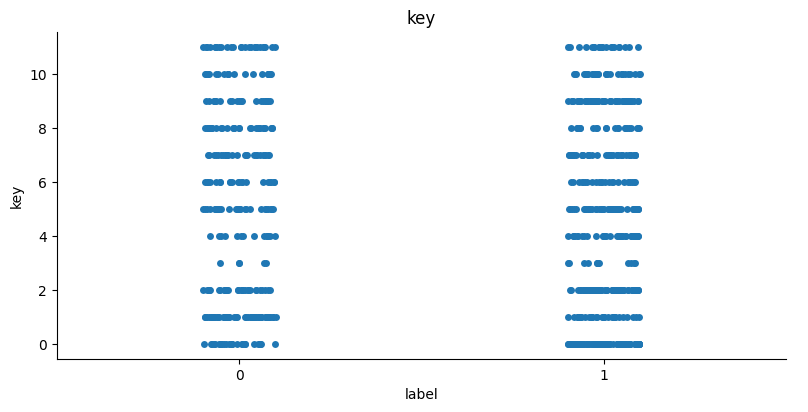

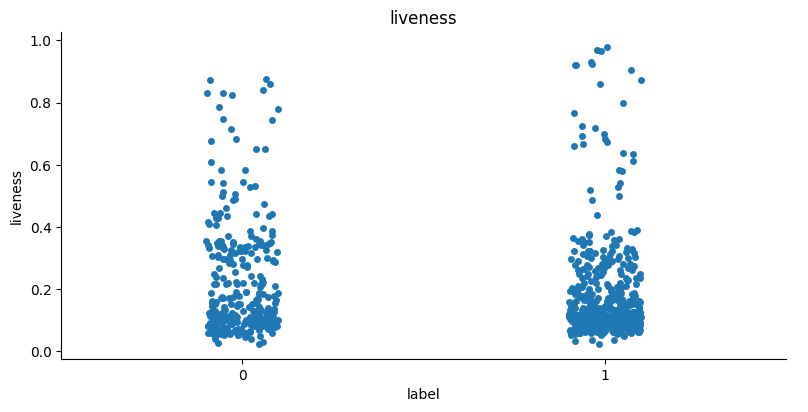

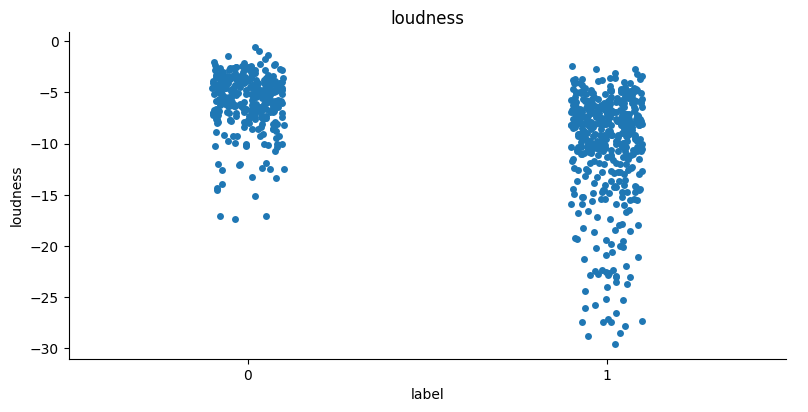

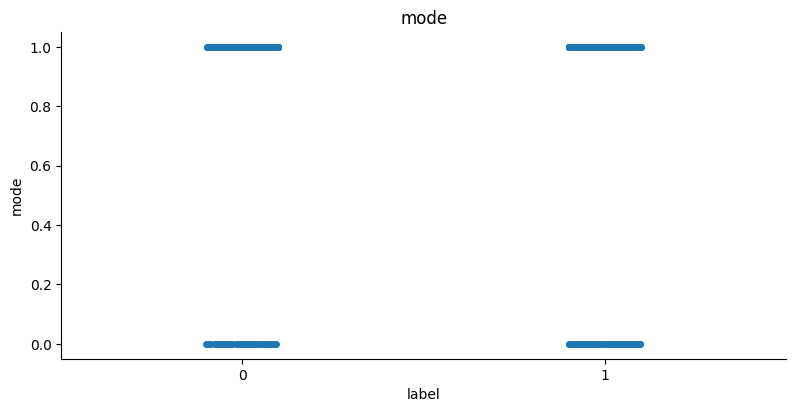

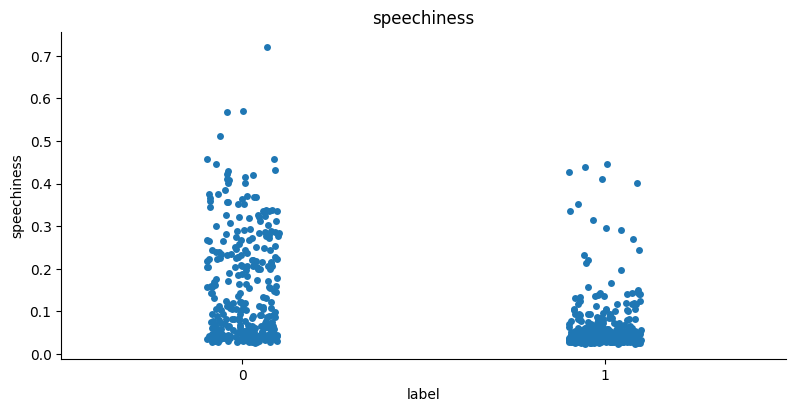

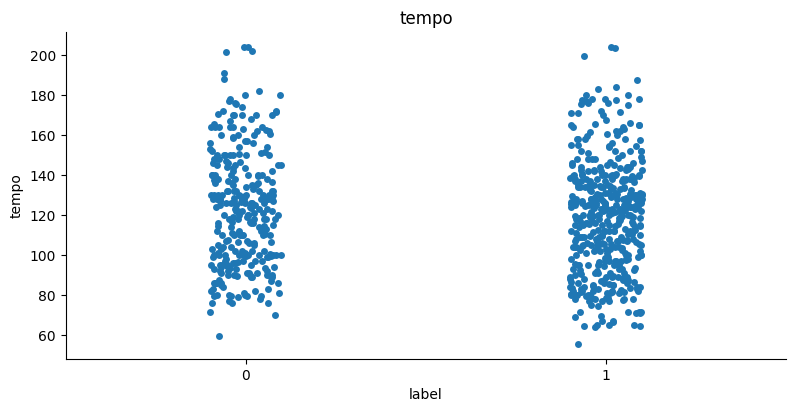

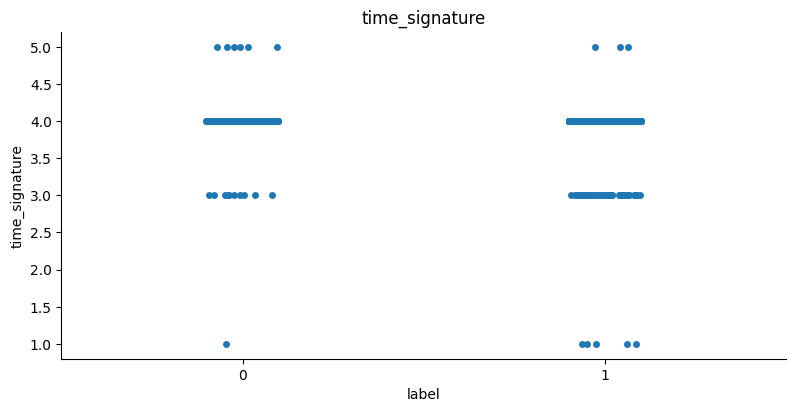

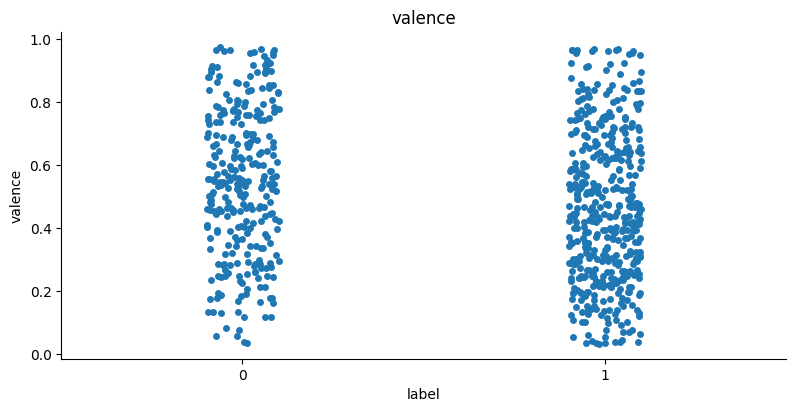

In [ ]:
# visualization
f=['acousticness','danceability','duration','energy','instrumentalness','key',
   'liveness','loudness','mode','speechiness','tempo','time_signature','valence']
for f_ in f:
    sns.catplot(x='label', y=f_, data=training_set,height=4,aspect=2)
    plt.title(f_)

In [5]:
features=['acousticness','danceability','energy','loudness','speechiness']
features3=['acousticness','energy','loudness','speechiness']


In [ ]:
from sklearn import svm

X=training_set[features]
y=training_set['label']

scaler = StandardScaler()
X = scaler.fit_transform(X) # Scale the features

Cs=[0.5, 1, 2, 5, 10, 15] # L2 Penalty
ker=['linear', 'poly', 'rbf', 'sigmoid']

# cross validation
for k in ker:
  pipeline=Pipeline([('model', svm.SVC(kernel=k, C=2, tol=1e-3, random_state=1))])
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
  print('kernel:',k)
  print('accuracy=',scores.mean())

kernel: linear
accuracy= 0.8039999999999999
kernel: poly
accuracy= 0.8159999999999998
kernel: rbf
accuracy= 0.8426666666666666
kernel: sigmoid
accuracy= 0.7426666666666667


In [ ]:
# svm
from sklearn import svm
X=training_set[features]
y=training_set['label']
X_test=test_set[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)

clf=svm.SVC(kernel='rbf', C=10, tol=1e-3)
clf.fit(X_train_scaled, y)
y_pred=clf.predict(X_test_scaled)

# output the prediction
output = pd.DataFrame({'predict': y_pred})
output.to_csv('submission.csv', index=False)
print(y_pred)
result = ''.join(map(str, y_pred))
print(result)

[1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1]
10010111001101101011101110100011011111010101110110001101100011100111101011110110110101110000011011111111010111111010100001111110101011111111101011000010001111101101111101111001011010111110100111100111


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X=training_set[features]
y=training_set['label']
n_est=[50, 100, 125, 150] # n_estimators(number of trees)
criteria=['gini','entropy','log_loss'] # loss function criterion
max_d=[2, 5, 10, 50, None] # max depth of the trees

for c in criteria:
  pipeline=Pipeline([('model', RandomForestClassifier(n_estimators=50, criterion=c, max_depth=5, random_state=1))])
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
  print('criteria',c)
  print('accuracy=',scores.mean())

criteria gini
accuracy= 0.8480000000000001
criteria entropy
accuracy= 0.852
criteria log_loss
accuracy= 0.852


In [6]:
# random forest

from sklearn.ensemble import RandomForestClassifier
X=training_set[features]
y=training_set['label']
X_test=test_set[features]

clf=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=2)
clf.fit(X, y)
y_pred=clf.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'predict': y_pred})
output.to_csv('submission.csv', index=False)
print(y_pred)
result = ''.join(map(str, y_pred))
print(result)

[1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]
11010111001101101011101100000011011111010101011110001101100011000111101011010110110111110010011011111010010111011010101101111110101011111111101111001010001111101101111111111001111010111110100111110111
